In [1]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from dataset.chirping_binary import ChirpingBinary

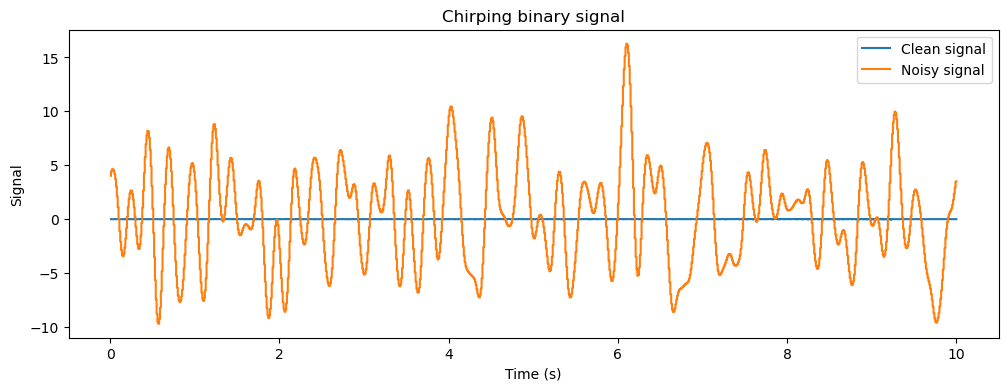

In [2]:
rng_key = jax.random.PRNGKey(0)
dataset = ChirpingBinary(episode_duration_s=10.0, sample_rate_Hz=100, scale=1e20)
noisy_signal, clean_signal = dataset.sample(rng_key)

plt.figure(figsize=(12, 4))
plt.step(dataset.times, clean_signal, label="Clean signal")
plt.step(dataset.times, noisy_signal, label="Noisy signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Chirping binary signal")
plt.legend()
plt.show()

In [3]:
rng_key = jax.random.PRNGKey(0)
dataset = ChirpingBinary()
get_batch = jax.jit(dataset.get_batch, static_argnames="batch_size")
for rng_subkey in tqdm(jax.random.split(rng_key, 10)):
    noisy_signal, clean_signal = get_batch(rng_key, batch_size=64)
    print(noisy_signal.shape, clean_signal.shape)

  0%|          | 0/10 [00:00<?, ?it/s]

(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
(64, 100000) (64, 100000)
